# Global Air Pollution Analysis

### Project Overview

This project aimed to examine global pollution trends by analyzing Air Quality Index (AQI) values.Clustering techniques were applied to group countries with similar AQI levels, enabling the identificationof regions sharing common pollution patterns. This method provided valuable insights into geographical pollution dynamics, emphasizing areas in need of immediate action.Additionally, the analysis investigated continental variations and identified outliers, offering a detailed overview of global air quality.

### Dataset Description
* Source: https://www.kaggle.com/datasets/sazidthe1/global-air-pollution-data
* Dataset Structure: 
    * country_name: Name of the Country
    * city_name: Name of the City
    * aqi_value: Overall AQI value of the city
    * aqi_category: Overall AQI category of the city
    * co_aqi_value: AQI value of Carbon Monoxide of the city
    * co_aqi_category: AQI category of Carbon Monoxide of the city
    * ozone_aqi_value: AQI value of Ozone of the city
    * ozone_aqi_category: AQI category of Ozone of the city
    * no2_aqi_value: AQI value of Nitrogen Dioxide of the city
    * no2_aqi_category: AQI category of Nitrogen Dioxide of the city
    * pm2.5_aqi_value: AQI value of Particulate Matter with a diameter of 2.5 micrometers or less of the city
    * pm2.5_aqi_category: AQI category of Particulate Matter with a diameter of 2.5 micrometers or less of the city
 



In [ ]:
# ANALYSIS

In [1]:
# Importing libraries for the analysis
import pandas as pd  # For data manipulation pd is alias
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For data visualization

In [2]:
# Load the dataset to the dataframe 
# assign variable to access using its variable instead of library name
gap = pd.read_csv(r"G:\PYTHON\PROJECT\global_air_pollution_data.csv")
gap

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [5]:
gap.shape #shape gives the features and observation i.e (number of rows and columns)

(23463, 12)

In [95]:
gap.head(10) #display the first 10 rows to verify it loaded correctly

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
6,Germany,Puttlingen,62,Moderate,1,Good,35,Good,3,Good,62,Moderate
7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate
8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate
9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,3,Good,89,Moderate,9,Good,142,Unhealthy for Sensitive Groups


In [22]:
gap.tail() ##display the bottom 10 rows to verify it loaded correctly

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate
23462,Malaysia,Marang,70,Moderate,1,Good,38,Good,0,Good,70,Moderate


In [7]:
gap.columns #display the column names

Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value\t', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm2.5_aqi_value', 'pm2.5_aqi_category'],
      dtype='object')

In [9]:
gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value	       23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [28]:
gap.dtypes #to see the data types

country_name          object
city_name             object
aqi_value              int64
aqi_category          object
co_aqi_value\t         int64
co_aqi_category       object
ozone_aqi_value        int64
ozone_aqi_category    object
no2_aqi_value          int64
no2_aqi_category      object
pm2.5_aqi_value        int64
pm2.5_aqi_category    object
dtype: object

In [11]:
# to check the null values are present in the data 
gap.isnull().sum()

country_name          427
city_name               1
aqi_value               0
aqi_category            0
co_aqi_value\t          0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64

In [13]:
gap.describe() #it shows the min,max,mean,5 number ssummary

,aqi_value,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


Data Cleaning

In [15]:
#to calculate number of null values
gap.isnull().sum() 


country_name          427
city_name               1
aqi_value               0
aqi_category            0
co_aqi_value\t          0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64

In [17]:
# drop rows with the misiing column
gap_cleaned = gap.dropna()

# Verify no missing values
print(gap_cleaned.isnull().sum())

country_name          0
city_name             0
aqi_value             0
aqi_category          0
co_aqi_value\t        0
co_aqi_category       0
ozone_aqi_value       0
ozone_aqi_category    0
no2_aqi_value         0
no2_aqi_category      0
pm2.5_aqi_value       0
pm2.5_aqi_category    0
dtype: int64


In [19]:
# Check for duplicates
gap.duplicated().sum()

0

In [ ]:
AIR QUALITY INDEX VALUE DISTRIBUTION

Distribution of Overall AQI Values Globally


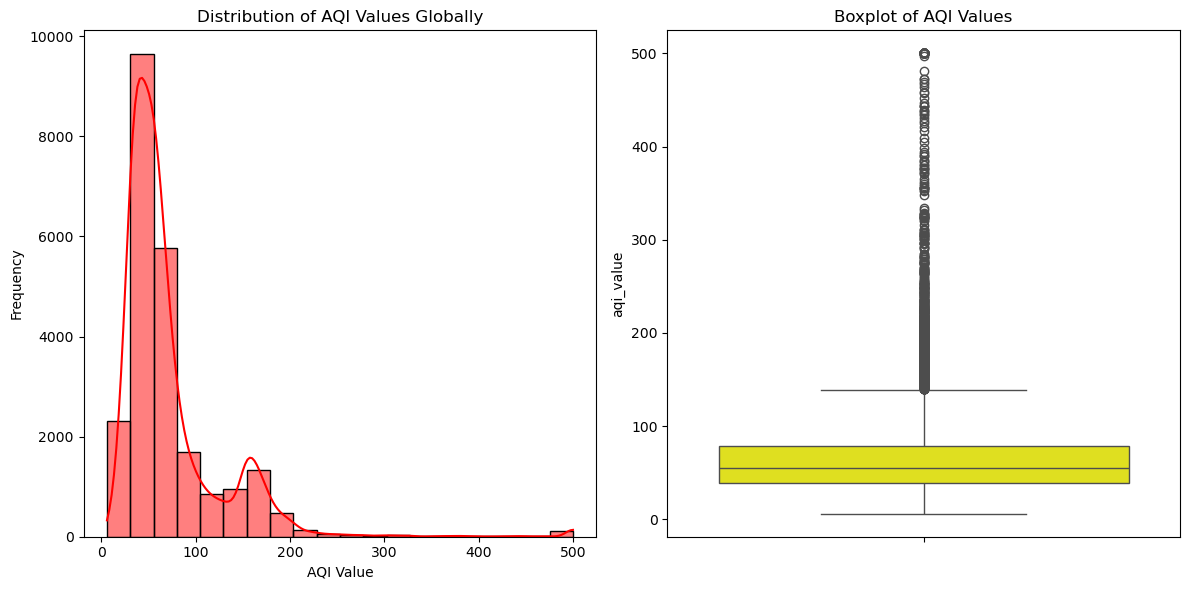

In [21]:
# Distribution of AQI values globally
plt.figure(figsize=(12,6))

# Histogram :-To summarize discrete or continuous data that are 
# measured on an interval scale

plt.subplot(1, 2, 1)
sns.histplot(gap['aqi_value'], bins=20, kde=True,color='red')
# the histogram will be displayed without the smooth density curve overlay. If you want the KDE curve, you can set kde=True
plt.title('Distribution of AQI Values Globally')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')

# Boxplot for identifying outliers
plt.subplot(1, 2, 2)
sns.boxplot(gap['aqi_value'], color='yellow')
plt.title('Boxplot of AQI Values')

plt.tight_layout() #ensures that everything fits nicely within the figure
plt.show()


In [23]:
# Select top 20 countries with the highest median AQI values
top_countries=gap_cleaned.groupby('country_name')['aqi_value'].median().nlargest(20).index
gap_top_countries=gap_cleaned[gap_cleaned['country_name'].isin(top_countries)]

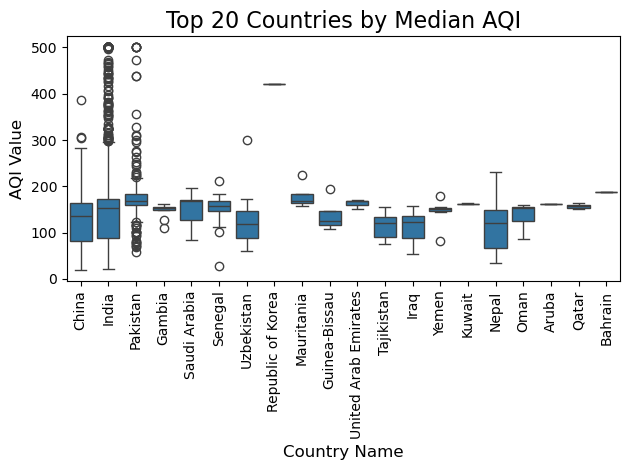

In [113]:
# box plot : Boxplots are useful for visualizing medians, ranges, and outliers.
sns.boxplot(x='country_name',y='aqi_value',data=gap_top_countries)
plt.title('Top 20 Countries by Median AQI', fontsize=16)
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

There are a lot of different countries in the dataset, I've decided to group the countries by continents to improve readability.

In [25]:
unique_countries = gap_cleaned['country_name'].unique()
print(unique_countries)

['Russian Federation' 'Brazil' 'Italy' 'Poland' 'France'
 'United States of America' 'Germany' 'Belgium' 'Egypt' 'China'
 'Netherlands' 'India' 'Pakistan' 'Republic of North Macedonia' 'Colombia'
 'Romania' 'Indonesia' 'Finland' 'South Africa'
 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'Haiti' 'Somalia' 'Philippines' 'Latvia'
 'Chad' 'New Zealand' 'Tunisia' 'Viet Nam' 'Iran (Islamic Republic of)'
 'Mexico' 'Japan' 'El Salvador' 'Bulgaria' 'Nigeria' 'South Sudan'
 'Guatemala' 'Ireland' 'Turkey' 'Peru' 'Democratic Republic of the Congo'
 'Canada' 'Switzerland' 'Denmark' 'Cameroon' 'Australia' 'Portugal'
 "Côte d'Ivoire" 'Sweden' 'Ethiopia' 'Thailand' 'Hungary' 'Kazakhstan'
 'Israel' 'Spain' 'Myanmar' 'Papua New Guinea' 'Madagascar' 'Lithuania'
 'Ghana' 'Azerbaijan' 'Armenia' 'Ukraine' 'Malaysia' 'Serbia' 'Slovakia'
 'Gambia' 'Ecuador' 'Bosnia and Herzegovina' 'Czechia' 'Argentina'
 'Dominican Republic' 'Guinea' 'Bolivia (Plurinational State of)

In [35]:
# Create a dictionary mapping countries to continents
country_to_continent = {
    'Russian Federation': 'Europe',
    'Brazil': 'South America',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'France': 'Europe',
    'United States of America': 'North America',
    'Germany': 'Europe',
    'Belgium': 'Europe',
    'China': 'Asia',
    'Netherlands': 'Europe',
    'Republic of North Macedonia': 'Europe',
    'India': 'Asia',
    'Colombia': 'South America',
    'Romania': 'Europe',
    'Indonesia': 'Asia',
    'Finland': 'Europe',
    'South Africa': 'Africa',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'United Republic of Tanzania': 'Africa',
    'Egypt': 'Africa',
    'Somalia': 'Africa',
    'Philippines': 'Asia',
    'Latvia': 'Europe',
    'Chad': 'Africa',
    'New Zealand': 'Oceania',
    'Tunisia': 'Africa',
    'Viet Nam': 'Asia',
    'Mexico': 'North America',
    'Japan': 'Asia',
    'El Salvador': 'North America',
    'Bulgaria': 'Europe',
    'Nigeria': 'Africa',
    'South Sudan': 'Africa',
    'Guatemala': 'North America',
    'Ireland': 'Europe',
    'Turkey': 'Asia',
    'Peru': 'South America',
    'Canada': 'North America',
    'Switzerland': 'Europe',
    'Denmark': 'Europe',
    'Cameroon': 'Africa',
    'Australia': 'Oceania',
    'Portugal': 'Europe',
    "Côte d'Ivoire": 'Africa',
    'Sweden': 'Europe',
    'Ethiopia': 'Africa',
    'Thailand': 'Asia',
    'Hungary': 'Europe',
    'Kazakhstan': 'Asia',
    'Israel': 'Asia',
    'Spain': 'Europe',
    'Papua New Guinea': 'Oceania',
    'Madagascar': 'Africa',
    'Lithuania': 'Europe',
    'Ghana': 'Africa',
    'Azerbaijan': 'Asia',
    'Armenia': 'Asia',
    'Iran (Islamic Republic of)': 'Asia',
    'Ukraine': 'Europe',
    'Malaysia': 'Asia',
    'Serbia': 'Europe',
    'Slovakia': 'Europe',
    'Ecuador': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Czechia': 'Europe',
    'Argentina': 'South America',
    'Dominican Republic': 'North America',
    'Guinea': 'Africa',
    'Bolivia (Plurinational State of)': 'South America',
    'Sudan': 'Africa',
    'Chile': 'South America',
    'Panama': 'North America',
    'Congo': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Mauritius': 'Africa',
    'Greece': 'Europe',
    'Malawi': 'Africa',
    'Cuba': 'North America',
    'Benin': 'Africa',
    'Sierra Leone': 'Africa',
    'Haiti': 'North America',
    'Lebanon': 'Asia',
    'Uruguay': 'South America',
    'Namibia': 'Africa',
    'Albania': 'Europe',
    'Guyana': 'South America',
    'Mongolia': 'Asia',
    'Democratic Republic of the Congo': 'Africa',
    'Solomon Islands': 'Oceania',
    'Paraguay': 'South America',
    'Zimbabwe': 'Africa',
    'Austria': 'Europe',
    'Croatia': 'Europe',
    'Myanmar': 'Asia',
    'Honduras': 'North America',
    'Cambodia': 'Asia',
    'Uganda': 'Africa',
    'Republic of Moldova': 'Europe',
    'Pakistan': 'Asia',
    'Angola': 'Africa',
    'Kingdom of Eswatini': 'Africa',
    'Uzbekistan': 'Asia',
    'Zambia': 'Africa',
    'Morocco': 'Africa',
    'Belarus': 'Europe',
    'Norway': 'Europe',
    'Venezuela (Bolivarian Republic of)': 'South America',
    'Malta': 'Europe',
    'Sri Lanka': 'Asia',
    'Botswana': 'Africa',
    'Burundi': 'Africa',
    'Jamaica': 'North America',
    'Central African Republic': 'Africa',
    'Kenya': 'Africa',
    'Niger': 'Africa',
    'Rwanda': 'Africa',
    'Mali': 'Africa',
    'Slovenia': 'Europe',
    'Costa Rica': 'North America',
    'Nicaragua': 'North America',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Mozambique': 'Africa',
    'Eritrea': 'Africa',
    'Barbados': 'North America',
    'Algeria': 'Africa',
    'Syrian Arab Republic': 'Asia',
    'Gabon': 'Africa',
    'Afghanistan': 'Asia',
    'Liberia': 'Africa',
    "Lao People's Democratic Republic": 'Asia',
    'Bhutan': 'Asia',
    'Tajikistan': 'Asia',
    'Togo': 'Africa',
    'Iraq': 'Asia',
    'Bangladesh': 'Asia',
    'Turkmenistan': 'Asia',
    'Saint Lucia': 'North America',
    'Libya': 'Africa',
    'Georgia': 'Europe',
    'Estonia': 'Europe',
    'Nepal': 'Asia',
    'Trinidad and Tobago': 'North America',
    'Lesotho': 'Africa',
    'Jordan': 'Asia',
    'Cyprus': 'Europe',
    'Montenegro': 'Europe',
    'Comoros': 'Africa',
    'Iceland': 'Europe',
    'Andorra': 'Europe',
    'Equatorial Guinea': 'Africa',
    'Luxembourg': 'Europe',
    'Vanuatu': 'Oceania',
    'Belize': 'North America',
    'Senegal': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Palau': 'Oceania',
    'Suriname': 'South America',
    'Singapore': 'Asia',
    'Maldives': 'Asia',
    'Saudi Arabia': 'Asia',
    'Seychelles': 'Africa',
    'State of Palestine': 'Asia',
    'Oman': 'Asia',
    'Yemen': 'Asia',
    'Saint Kitts and Nevis': 'North America',
    'Monaco': 'Europe',
    'Gambia': 'Africa'
}


In [37]:

# Apply the mapping to the dataset
gap_cleaned = gap_cleaned.copy() #reate a copy of gap_cleaned so that any transformations (like adding the continent column) won't modify the original dataset.
gap_cleaned.loc[:, 'continent'] = gap_cleaned['country_name'].map(country_to_continent)

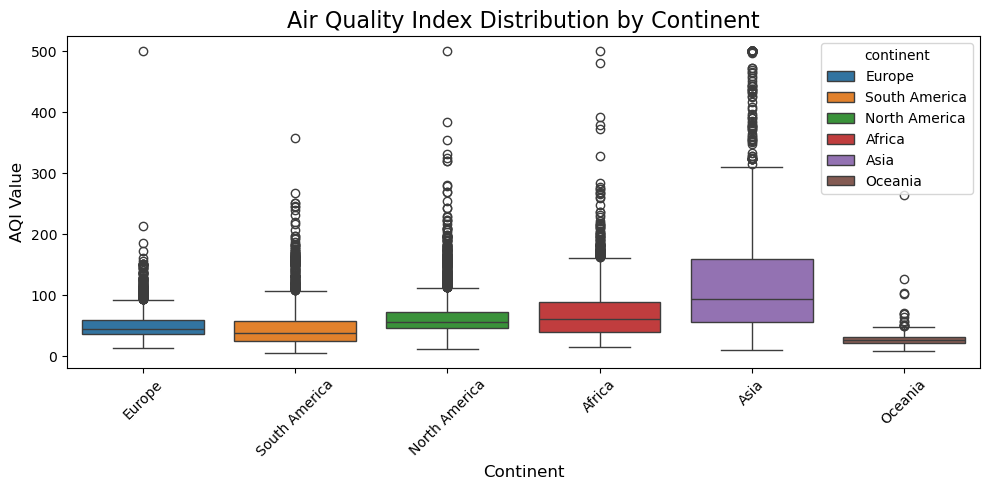

In [49]:
# Create a boxplot by continent :Boxplots are useful for visualizing medians, ranges, and outliers.
plt.figure(figsize=(10, 5))
sns.boxplot(x='continent', y='aqi_value', data=gap_cleaned, hue='continent')
plt.xticks(rotation=45)
plt.title('Air Quality Index Distribution by Continent', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)
plt.tight_layout()
plt.show()

Asia:
Worst AQI: Asia has the highest median AQI value, indicating that air quality is generally poor in this region.

Many Outliers: The presence of numerous outliers suggests that certain areas in Asia have extreme pollution levels, contributing to the overall high AQI.

Europe:
Higher Outliers: Europe shows a range of AQI values similar to other continents, but it has higher outliers, indicating that certain regions are significantly more polluted than others.

Similar Range: The overall AQI distribution is comparable to North America, South America, and Africa, showing no extreme differences in average air quality.
South America:

Similar AQI Range: South America has a comparable AQI distribution to Europe, North America, and Africa, suggesting a moderate overall air quality across the continent.

North America:
Higher Outliers: Similar to Europe, North America has a few higher outliers, indicating areas with significantly worse air quality (i.e., extreme pollution in specific locations).

Similar Range: In terms of the overall AQI distribution, North America is comparable to South America, Europe, and Africa.

Africa:
Higher Outliers: Africa, like Europe and North America, exhibits higher outliers, suggesting that some regions face severe pollution issues.

Similar Range: Overall, the AQI distribution is similar to other continents, but the higher outliers show that there are pockets of very poor air quality.

Oceania:
Lowest AQI Values: Oceania has the lowest AQI values, indicating that the air quality is generally very good in this region.

Few Outliers: The absence of many outliers suggests that the region maintains consistently clean air with few extreme pollution events.

In [51]:
# List of AQI columns for each pollutant
pollutants = ['co_aqi_value\t', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']
summary_stats = {}

# For each pollutant column, group by 'country' and calculate the summary statistics
for pollutant in pollutants:
    summary_stats[pollutant] = gap_cleaned.groupby('country_name')[pollutant].agg(['mean', 'median', 'min', 'max'])

# Display the summary statistics for each pollutant
for pollutant, stats in summary_stats.items():
    print(f"Summary statistics for {pollutant}:")
    print(stats)

Summary statistics for co_aqi_value	:
                                        mean  median  min  max
country_name                                                  
Afghanistan                         0.591837     1.0    0    2
Albania                             1.000000     1.0    1    1
Algeria                             1.916667     1.0    0   10
Andorra                             0.666667     1.0    0    1
Angola                              3.148148     1.0    0   23
...                                      ...     ...  ...  ...
Venezuela (Bolivarian Republic of)  1.277778     1.0    0    4
Viet Nam                            2.366667     2.0    0   10
Yemen                               1.285714     1.0    1    2
Zambia                              0.690476     1.0    0    2
Zimbabwe                            1.296296     1.0    0    5

[175 rows x 4 columns]
Summary statistics for ozone_aqi_value:
                                         mean  median  min  max
country_name   

In [125]:
def top_10_polluting_countries(gap, pollutants):
    # Calculate the average AQI for each pollutant by country
    gap['mean_aqi'] = gap[pollutants].mean(axis=1)
    
    # Group by country and calculate the mean AQI across all pollutants
    country_aqi = gap.groupby('country_name')['mean_aqi'].mean()
    
    # Sort countries by their mean AQI in descending order and select top 10
    top_10_countries = country_aqi.sort_values(ascending=False).head(10)
    
    return top_10_countries

# List of pollutant AQI columns
pollutants = ['co_aqi_value\t', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']

# Call the function and display the top 10 polluting countries
top_10 = top_10_polluting_countries(gap_cleaned, pollutants)
print("Top 10 polluting countries based on average AQI:")
print(top_10)


Top 10 polluting countries based on average AQI:
country_name
Republic of Korea       133.250000
Bahrain                  80.000000
United Arab Emirates     79.250000
Kuwait                   78.500000
Qatar                    72.250000
Pakistan                 66.600977
Oman                     58.958333
Saudi Arabia             57.071429
China                    52.633333
Mauritania               52.062500
Name: mean_aqi, dtype: float64


C:\Users\sshar\AppData\Local\Temp\ipykernel_11424\1900863522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gap['mean_aqi'] = gap[pollutants].mean(axis=1)


In [55]:
def bottom_10_polluting_countries(gap, pollutants):
    # Calculate the average AQI for each pollutant by country
    gap['mean_aqi'] = gap[pollutants].mean(axis=1)
    
    # Check the actual column name for countries and use it in the grouping
    # Assuming the column name is 'country_name'
    country_aqi = gap.groupby('country_name')['mean_aqi'].mean()
    
    # Sort countries by their mean AQI in ascending order and select bottom 10
    bottom_10_countries = country_aqi.sort_values(ascending=True).head(10)
    
    return bottom_10_countries

# List of pollutant AQI columns
pollutants = ['co_aqi_value\t', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']

# Call the function and display the bottom 10 polluting countries
bottom_10 = bottom_10_polluting_countries(gap_cleaned, pollutants)
print("10 countries with the lowest pollution based on average AQI:")
print(bottom_10)

10 countries with the lowest pollution based on average AQI:
country_name
Palau                                5.750000
Solomon Islands                      6.000000
Bolivia (Plurinational State of)     8.068182
Maldives                             8.500000
Papua New Guinea                     9.083333
Uruguay                             10.423077
Iceland                             10.583333
Argentina                           10.670290
Bhutan                              12.000000
Madagascar                          12.000000
Name: mean_aqi, dtype: float64
